In [285]:
import qrcode
import base64
from io import BytesIO
from PIL import Image
import pandas as pd
import numpy as np
import copy 
import PIL
import tkinter
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.colormasks import RadialGradiantColorMask
import copy

In [286]:
def generateQRSRC(sku):
    qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=3,
    border=0,
    )
    qr.add_data(sku)
    qr.make(fit=True)

    img = qr.make_image(fill_color="black", back_color="white") #of (image_factory=StyledPilImage, color_mask=RadialGradiantColorMask())
    im_file = BytesIO()
    img.save(im_file, format="JPEG")
    im_bytes = im_file.getvalue()
    im_b64 = base64.b64encode(im_bytes)

    img_source = f'data:image/jpeg;base64,{im_b64.decode("utf-8")}'
    return img_source

''
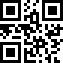

In [287]:
generateQRSRC('asdf')

In [288]:
df = pd.read_csv('./Vaulted Inventory & Consignment Management Verson.csv')
df.columns = [c.lower() for c in df.columns]
df['vintage'] = df['vintage'].astype(int).astype(str)

In [289]:
df

,company,vault,suffix,sku,producer,release,vintage,volume,size,qty,case,bin,alc
0,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/LOU...,Lourensford,Limited Release SMV,2019,750 ml,6,10,"R1,650.00",9,15 % Vol
1,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/DHF...,Doolhof,Bloedklip Malbec,2017,750 ml,6,5,"R5,670.00",13,13 % Vol
2,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/DHF...,Doolhof,Riviersteen Chenin Blanc,2018,750 ml,6,5,"R2,520.00",17,12 % Vol
3,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/DHF...,Doolhof,Morestond Chardonnay,2017,750 ml,6,5,"R2,520.00",21,12 % Vol
4,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/WAT...,Waterkloof,Circumstance Merlot,2012,750 ml,6,2,R720.00,22,13 % Vol


In [290]:
with open('./template.html', 'r') as f:
    lines = f.readlines()
html = ''.join(lines)

In [291]:
template = """<h3>COMPANY_NAME</h3>
<img src="SOURCE_BASE64" style="float:right">
<h4>VAULT_NAME</h4>
<h4>PRODUCER</h4>
<h5>RELEASE, VINTAGE</h5>
<p style="float:right">Powered by Fanfire</p>"""

In [292]:
items = []
for i, row in df.iterrows():
    item = copy\
    .deepcopy(template)\
    .replace("COMPANY_NAME", row['company'])\
    .replace("VAULT_NAME", row['vault'])\
    .replace("PRODUCER", row['producer'])\
    .replace("RELEASE", row['release'])\
    .replace("VINTAGE", row['vintage'])\
    .replace("SOURCE_BASE64", generateQRSRC(row['sku']))
    
    items.append(item)

In [293]:
items = items + items + items

In [294]:
from pathlib import Path
from time import time

In [ ]:
run_dir = Path(str(time()))
run_dir.mkdir()
page_nr = 0 
page = copy.deepcopy(html)
for item_nr, item in enumerate(items):
    print(item_nr, page_nr) 
    page = page.replace(f'ITEM_{(item_nr%10)+1}_HTML', item)
    if (item_nr + 1) % 10 == 0:
        with open(run_dir/f'page-{page_nr}.html', 'w') as f:
            f.write(page)
        page_nr = page_nr + 1
        page = copy.deepcopy(html)
with open(run_dir/f'page-{page_nr}.html', 'w') as f:
    f.write(page)